# Tomato Disease Detection

This project aims to detect tomato diseases by extracting information from tomato leaf images. To achieve this goal, the project employs machine learning algorithms, specifically the Random Forest algorithm. This problem primarily required a supervised learning technique because the available dataset was labeled data. The project further uses a classification algorithm, specifically the Random Forest Algorithm, because the dataset available had around 10 classes. Here is a step-by-step process behind this project:

1. **Identify the Dataset:**
   The first step of the project was to identify a suitable dataset for this particular problem. We found a dataset from Kaggle, the Plant Village Dataset, which is an excellent source for crop disease detection problems.

2. **Data Preprocessing:**
   The second step involved preprocessing the images. This included resizing the images to a uniform size and normalizing pixel values to ensure consistency across all images. Proper preprocessing enhances the model's performance and accuracy.

3. **Feature Extraction:**
   The third step was extracting features from the images. We used methods like color histogram extraction and Local Binary Patterns (LBP) to capture essential color and texture features. These features help in distinguishing between healthy and diseased leaves.

4. **Splitting the Dataset:**
   Next, we split the dataset into training and testing sets. This division allows us to train the model on one part of the data and test its performance on another, ensuring that the model generalizes well to new, unseen data.

5. **Training the Model:**
   Using the training set, we trained a Random Forest classifier. This algorithm is suitable for classification tasks with multiple classes and is effective in managing overfitting compared to single decision trees.

6. **Model Evaluation:**
   After training, the model was evaluated using the testing set. We used metrics such as accuracy, precision, recall, and F1-score to assess the model's performance. Confusion matrices were also utilized to visualize the model's effectiveness across different classes.

7. **Model Optimization:**
   To enhance the model's performance, hyperparameter tuning was performed. This process involved adjusting parameters like the number of trees in the forest and the maximum depth of the trees to find the optimal settings.

8. **Implementation and Testing:**
   The trained model was then implemented in a real-world application. This involved integrating the model into a web or mobile application where users could upload images of tomato leaves, and the model would predict the disease type based on the uploaded image.

9. **Deployment:**
   The final step was deploying the application. This required setting up a server to ensure the application was accessible to users. Continuous monitoring and updates to the model were also necessary to maintain its accuracy and effectiveness over time.

By following these steps, the project successfully developed a model capable of detecting tomato diseases with high accuracy, aiding farmers and agricultural professionals in early disease identification and crop management.


## importing necessary libraries required
- `os`: Used for reading files from a folder.
- `cv2`: Used for reading images from the folder.
- `numpy`: Used for handling large collections of data.
- `sklearn.preprocessing.LabelEncoder`: Encodes labels with a value between 0 and n_classes-1.
- `sklearn.ensemble.RandomForestClassifier`: Random forest classifier for training the model.
- `sklearn.metrics`: Used for evaluating the model (classification report, accuracy score, confusion matrix).
- `joblib`: Used for saving and loading the trained model.
- `matplotlib.pyplot`: Used for plotting and visualizations.
- `skimage.feature.local_binary_pattern`: Extracts local binary patterns from images for feature extraction.


In [2]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

### Data PreProcessing

#### Loading Images
The first step in our data preprocessing pipeline involves loading images from the dataset. We organized the images and their corresponding labels from the training and testing folders. This step is crucial for preparing the dataset for further processing.

#### Displaying a Sample Image
To get an initial understanding of the dataset, we selected and displayed a sample image from the training set. This visualization helps in verifying the correctness and quality of the loaded images.

#### Preprocessing Images
We resized all images to a standard size of 128x128 pixels and converted the pixel values to `uint8` format. This preprocessing step ensures uniformity in the dataset, making it suitable for feeding into the machine learning model.

#### Extracting Features
To extract meaningful features from the images, we used two methods:
- **Color Histogram**: Converts the image to HSV color space and computes a color histogram, capturing the color distribution of the image.
- **Local Binary Pattern (LBP)**: Converts the image to grayscale and computes LBP features, capturing the texture of the image.
We combined these features into a single feature vector, capturing both color and texture information from the images.

#### Encoding Labels
We used a label encoder to convert string labels into numerical values. This transformation is necessary for training the machine learning model, as it requires numerical input for the labels.

#### Displaying a Sample Image with Extracted Features
We displayed a sample preprocessed image along with its extracted features. This step helps in understanding how the preprocessing and feature extraction steps have transformed the original image, ensuring that the data is ready for model training.


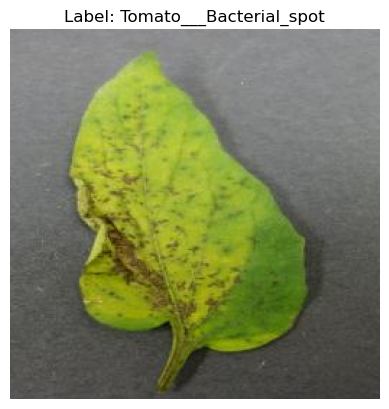

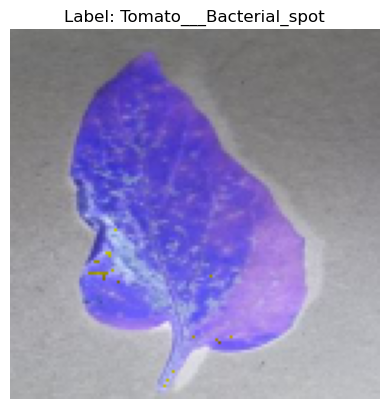

In [4]:
def load_images(folder):
    images = []
    labels = []
    
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
                    labels.append(subfolder)

    return images, labels

train_folder = 'Tomato_Data_Set/Train'
test_folder = 'Tomato_Data_Set/Test'

train_images, train_labels = load_images(train_folder)
test_images, test_labels = load_images(test_folder)

idx = 0
selected_image = train_images[idx]

plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title(f'Label: {train_labels[idx]}')
plt.axis('off')
plt.show()

def preprocess_images(images, size = (128, 128)):
    preprocessed_images = []
    for img in images:
        img = cv2.resize(img, size)
        img = (img * 255).astype(np.uint8)
        preprocessed_images.append(img)
    return np.array(preprocessed_images)

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_lbp(image, P=8, R=1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_image, P, R, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, P + 3),
                             range=(0, P + 2))
    
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    
    return hist

def extract_features(image):
    color_hist = extract_color_histogram(image)
    lbp_hist = extract_lbp(image)
    return np.hstack((color_hist, lbp_hist))

train_features_combined = np.array([extract_features(img) for img in train_images])
test_features_combined = np.array([extract_features(img) for img in test_images])

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

idx = 0
selected_image = train_images[idx]
selected_features = train_features_combined[idx]

plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title(f'Label: {train_labels[idx]}')
plt.axis('off')
plt.show()


## Training the Model

In [5]:
model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(train_features_combined, train_labels_encoded)

RandomForestClassifier(random_state=42)

## Evaluating the Model

Accuracy: 0.9588607594936709
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        46
           1       0.83      0.97      0.89        30
           2       0.90      0.93      0.92        30
           3       0.97      0.97      0.97        30
           4       0.97      0.97      0.97        30
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        30
           7       0.97      0.93      0.95        30
           8       1.00      0.97      0.98        30
           9       1.00      1.00      1.00        30

    accuracy                           0.96       316
   macro avg       0.96      0.96      0.96       316
weighted avg       0.96      0.96      0.96       316



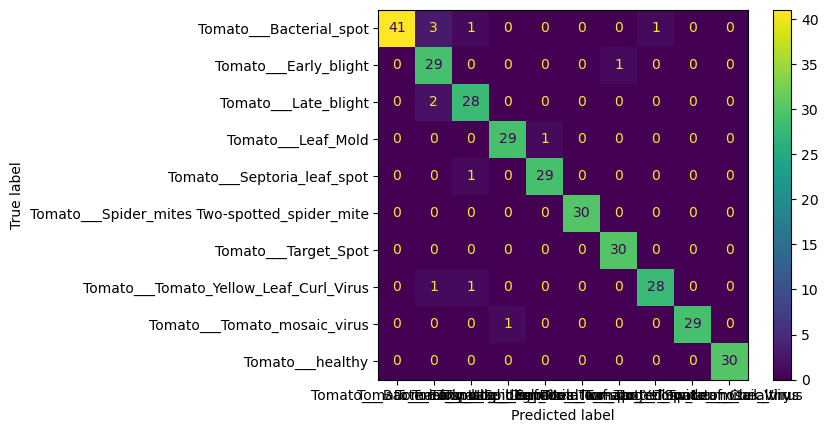

In [9]:
test_predictions = model.predict(test_features_combined)
print("Accuracy:", accuracy_score(test_labels_encoded, test_predictions))
print("Classification Report:\n", classification_report(test_labels_encoded, test_predictions, zero_division=1))

conf_matrix = confusion_matrix(test_labels_encoded, test_predictions)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
disp.plot()

## Saving the Model

In [8]:
model_filename = 'tomato_disease_model.pkl'
joblib.dump(model, model_filename)
label_encoder_filename = 'label_encoder.pkl'
joblib.dump(label_encoder, label_encoder_filename)

['label_encoder.pkl']